# Advances in Bioinformatics and Course Recap

2025-06-16


We will cover a few of the advances in bioinformatics, go over a recap of the top lessons from our course and part with a final discussion. 


## Table of Contents

[Introduction](#introduction)<br>
[Nanopore Adaptive Sampling](#nanopore-adaptive-sampling)<br>
[RNA Structure Prediction](#rna-structure-prediction)<br>
[Miscellaneous](#miscellaneous)<br>
[Machine Learning](#machine-learning)<br>
[Arificial Intelligence](#artificial-intelligence)<br>
[GeneGPT](#genegpt)<br>
[AlphaFold](#alphafold)<br>
[BCHM5420 in Review](#bchm5420-in-review)<br>
[What You Wanted to Know](#what-you-wanted-to-know)<br>
[Recap](#recap)


## Introduction


As we know from the range of topics covered in your final projects, the world of bioinformatics is quite broad. There are also new advances daily to stay on top of. It's important to keep up to date so your knowledge doesn't become outdated.  An easy way to do this is to stay on top of channels of interest to you in the µbioinfo slack channels, keeping an eye on preprints (ex. https://www.biorxiv.org/) or better yet the latest issues of your favourite peer reviewed journals. In our final lesson, we will walk through just a few hot topics in bioinformatics.



## Oxford Nanopore Adaptive Sampling

When we are performing whole genome sequencing, we are sequencing everything within a sample when we may only be interested in a specific target, such as a single gene of interest. The sample can contain contamininating sequences from a number of sources, such as unwanted bacterial or human DNA. Pull down (ex. bait capture) or PCR amplified amplicon sequencing is a way to select our targets of interest prior to sequencing. If there was a way to ***only*** sequence what we wanted to... that would be pretty cool.

Oxford nanopore adaptive sampling offers software-controlled enrichment which uses a reference file containing only the genome of the desired target (Martin et. al, 2022). During adaptive sampling, the first ~450 bps of the nucleic acid going through the pore undergoes a live, real-time alignment to the reference. In enrichment mode, if the read going through the pore matches the reference, the read will contiue to be sequenced, if it does not, it will be ejected from the pore. In depletion mode, the opposite is true. If a reference of known contaminants is supplied, the read will be ejected from the pore if there is a match. Targeted enrichment reduces the time taken to achieve a high-accuracy, single contig assembly, compared to non-targeted sequencing (Martin et. al, 2022).
 

<img src="../../images/12_adaptive_sampling_fig.png" width=900>

You can supply a bed file to specify specific regions of interest (ex. a gene) to enrich or deplete in your supplied reference.


<img src="../../images/12_adaptive_sampling_bed.png" width=900>


Let's watch [this video](http://youtube.com/watch?v=fwHreHs9FHg)

### Resources

- Martin, S., Heavens, D., Lan, Y. et al. Nanopore adaptive sampling: a tool for enrichment of low abundance species in metagenomic samples. Genome Biol 23, 11 (2022). https://doi.org/10.1186/s13059-021-02582-x
- https://nanoporetech.com/document/adaptive-sampling
- [Real-time targeted sequencing with adaptive sampling](https://www.youtube.com/watch?v=b4jkPDOBf1A)


## RNA structure prediction


We are all familiar with the two types of nucleic acids - DNA and RNA. They are made up of the same nucleotide bases A C and G  but differ in that DNA uses the the base T, whereas RNA  uses the base U. These specific bases can pair together by forming hydrogen bonds. and these are known as complementary base pairs.

RNAs often exist as single strands. The RNA sequence is the primary structure and the secondary structure forms when bases pair on the same strand, represented by  arcs that connect the complementary bases that pair

These are known as ***intramolecular*** base pairs when on the same nucleic acid. Nucleic acids are also capable of interacting with each other by forming base pairs between the two separate molecules. these are called ***intermolecular*** base pairs.


<img src="../../images/12_RNA_3.png" width=900>

In these diagrams, the arcs represent the hydrogen bonds connecting the base pairs. The model on the right is the more how we would intuitively visualize the structure, but the ***arc diagram*** on the left allows us to visualize this in a different way that translates to a model that is more computationally intuitive.

<img src="../../images/12_RNA_4_.png" width=900>






That "computationally intuitive" model is the ***dot bracket notation***. This allows the programs to work with and express the secondary structure for us. A dot represents a base that is unpaired and matching brackets represent bases that pair. 


<img src="../../images/12_RNA_8.png" width=900>


### Types of structure

There are different kinds of structures that each have their own structural energetics. If we remember our undergraduate biochemistry, the overall structure with the ***minimum free energy*** is the most likely structure to form because it is the most stable.

<img src="../../images/12_RNA_12.png" width=900>


**Pseudoknot vs. Pseudoknot free**

There are also pseudoknot free structures which are defined by no base pairs crossing over each other. 

<img src="../../images/12_RNA_5.png" width=900>


Pseudoknotted structures occur when bases in a loop pair with bases outside the loop, forming overlapping secondary structures.


<img src="../../images/12_RNA_6.png" width=900> <br>


It's easiest to visually see what a pseudoknot is vs. is not. 

<img src="../../images/12_RNA_11.png" width=900>




Computationally, pseudoknot free structures are easiest to predict, where as pseudoknotted structures are computationally more intensive to predict, but these structures are known to occur biologically. One example of this is **ribosomal frameshifting**.
- Viruses such as SARS-CoV-2 use pseudoknots for −1 programmed ribosomal frameshifting (−1 PRF) that allows them to produce multiple transcripts from a single RNA by causing the ribosome to shift between reading frames [(Trinity et al, 2023)](http://pmc.ncbi.nlm.nih.gov/articles/PMC10004594/)


### Interacting Nucleic Acids

To build upon this and go one step further, we can predict the interacting structure of two nucleic acids by treating it as a single strand, but including a ***dummy linker*** between the two molecules. By doing this, we can apply the methods used for single strand RNA secondary structure prediction to predict the structure upon their interaction.

<img src="../../images/12_RNA_9.png" width=900>

### Why do we care about structure 


**Structure = Function**: We really care about the structure of RNA molecules (or DNA or proteins), because it can tell give us clues about it's function. Just like the shape of a key determines which lock it fits into, the structure of a molecule determines how it interacts with other molecules.

For vaccine targets or antiviral therapies, knowing the RNA (or protein) structure helps us:

- Predict how a virus binds to host cell receptors.
- Identify accessible regions for targeting by small molecules, antisense oligos, or CRISPR RNAs.
- Design RNA-based vaccines (like mRNA vaccines) that maintain desired folding and stability.
- Interfere with critical RNA structures, such as pseudoknots that regulate viral protein synthesis.

Remember the pseudoknot example in SARS-CoV-2? Conserved RNA structures like the frameshift-stimulating pseudoknot are essential for viral replication. Disrupting these with drugs could stop the virus from making the proteins it needs to survive.


**Application Example: primer-target binding sites**

Let's think about what is going on in the context of a basic PCR assat.


Depending on where the primer binding region (or target) is on a sequence, it may or may not be so easy for the primer to bind to if it's more stable for the target to stay in it's ***intramolecular*** structure, than form an ***intermolecular*** structure the primer sequence.

<img src="../../images/12_RNA_10.png" width=900>


There are many tools that predict RNA secondary structure. [DinoKnot](https://ieeexplore.ieee.org/document/10433368/): Duplex Interaction of Nucleic Acids With PseudoKnots is a good choice if you are looking at interacting RNA or DNA molecules and want to be able to predict pseudoknotted structures (if energetically favourable). Another option is RNAcofold if you are not interested in pseudoknots. 

DinoKnot requires only the sequences of interest and their strand type, and the minimum free energy structure will be returned in dot bracket notation. (Note: Restricted_0 is the most stable pseudoknot-free stems from which the pseudoknotted structure is predicted from)

<img src="../../images/12_RNA_13_.png" width=400> <br>

<img src="../../images/12_RNA_14_.png" width=800><br>


Remember this from earlier? Let's pretend the primer sequence is sequence 2, highlighted in red, and sequence 1 is the N (nucleocapsid) gene in SARS-CoV-2. The region the primer is designed to bind to (based on sequence similarity) is highlighted in green.

<img src="../../images/12_RNA_9.png" width=900>



In this figure below, the interaction structure on the top is a variant strain of SARS-CoV-2 that was showing in the lab to be incapable of being detected by the N gene primers. The structure below is the interaction between the N gene primer and the SARS-CoV-2 reference genome from which the primer was designed. The mutations acquired in this variant caused changes in the structural energetics of the interaction that now make binding unfavourable.

<img src="../../images/12_RNA_15_.png" width=800>




## Miscellaneous

A few final miscellaneous tips and tricks.

### Online Tutorials

There are many tutorials freely available online to advance your bioinformatics knowlege.  

**Scikit-bio**

This tutorial may be of interest to those working with microbiome analyses in Python - https://github.com/scikit-bio/scikit-bio-tutorials 
The workshops are available as jupyter notebooks you can run on your local computer but also hosted on google colab so you can get to greater computational resources. 


**Bioinformatics.ca**

You can attend these workshops for a fee or get access to the worshop materials afterwards for free: https://bioinformaticsdotca.github.io/ 

- Beginner microbiome analyses: https://bioinformaticsdotca.github.io/BMB_2024
- STATS: https://bioinformaticsdotca.github.io/STAT_2024
- Infectious Disease Epidemiology: https://bioinformaticsdotca.github.io/IDE_2024 


**Nextflow Summit 2025**

Keep up to date with the latest going on with Nextflow: https://youtube.com/playlist?list=PLPZ8WHdZGxmWF9fpFcrUuHiozeUZoLb65&si=Ht8Mbc-FbeGsqQaQ 

Search online for recordings from the latest conferences so you can get accesss to all the information without the travel and cost of attending the conferences. 
However, be sure to still take all the opportunities you have to attend conferences through school and work for the experience and networking opportunities.  

You may want to look into https://seqera.io/ for the following resources:
- Sequera Platform: a cloud based platform for running Nextflow pipelines
- Sequera AI: access to AI trained specifically on Nextflow + Sequera topcs
- Sequera Wave containers: another option for building containers to use with your pipelines https://seqera.io/containers/ 

You may want to look into https://seqera.io/ for the following resources:
- Sequera Platform: a cloud based platform for running Nextflow pipelines
- Sequera AI: access to AI trained specifically on Nextflow + Sequera topcs
- Sequera Wave containers: another option for building containers to use with your pipelines https://seqera.io/containers/ 

### SciKit-bio

Check out this tutorial - May be of interest to those working with microbiome analyses - https://github.com/scikit-bio/scikit-bio-tutorials 
tutorials on google colab so don't have to worry about resources

### Pyjokes

You can add a joke to your scripts with the pyjokes package

<img src="../../images/laptop.png" width=70>




In [ ]:
conda activate uleth_advanced_bioinfo

conda install pyjokes

pyjokes -c all 


You can propose new jokes here: https://github.com/pyjokes/pyjokes/issues/10

### A cautionary tale

Let's pretend we are Merlin from the Kingsman Agency cataloguing agent missions from 2015. 


We have a folder containing a a file for each agent.

In [ ]:
2015_mission_reports/
├── eggsy_missions.csv
├── harry_missions.csv
├── roxy_missions.csv

If we read the file, we can see it categorizes their name, their mission and the date. 

`head -n 2 eggsy_missions.csv`

In [ ]:
agent,mission,date
Galahad,Save the World,2015-02-14

Merlin wants to compile this information to see who should be considered for the new Arthur position so he uses the following code:

In [ ]:
cd 2015_mission_reports 

# create a new file to summarize all of the missions, taking the header line of one of the files
head -n 1 eggsy_missions.csv > 2015_summary_missions.csv 

# add the contents of the mission files into the summary file (except for the header)
tail -qn+2 *missions.csv >> 2015_summary_missions.csv

The second after Merlin hits enter, he gets a call from Eggsy with a code purple. He opens a new terminal to clear the route through London for him. Once that issue is cleared up, it's the end of the day and Merlin decides to come back to summarizing the mission reports tomorrow. 

The next day he comes back to his original terminal but the computer seems to be having some sort of brain glitch. It's frozen and Merlin can't type. He gets a call from Roxy reminding him that the code purple from the day before needs to be logged. In a new terminal he tries to log the mission with the following command:

In [ ]:
echo 'Galahad,Code Purple - Charlie Hesketh attack,2015-08-16' >> 2015_mission_reports/eggy_missions.csv

However, his computer is still acting slow and unresponsive. A few minutes later the terminal returns a `DISK QUOTA EXCEEDED ERROR`. Calls start coming in from all the agents that all the servers are down. 

What is the cause of this? Hint: look back to his code he ran before he got the call from Eggsy. 

Merlin had created in infinite loop in his code. 
Applying this to a more relatable example in bioinformatics, perhaps you will have the same output file containing resistance mutations from different sequencing runs that you want to combine into one summary file. You may try to do something like this.  Never ever ***ever*** do this. If you want to combine files like this, make sure the summary file is in a different directory, or you are using a completely file naming pattern. 

You may think a text file can't get that big in the matter of a few hours... but you would be wrong. 

Instead, format the code to work from separate folders: 

In [ ]:
mkdir -p summary_mission_reports

cd summary_mission_reports

# create a new file to summarize all of the missions, taking the header line of one of the files
head -n 1 2015_mission_reports/eggsy_missions.csv > 2015_summary_missions.csv 

# add the contents of the mission files into the summary file (except for the header)
tail -qn+2 2015_mission_reports/*missions.csv >> 2015_summary_missions.csv

### Take a break

With all the complexity and time pressures that can come along with your bioinformatics analyses, troubleshooting and learning, it's very important to schedule breaks and take time off to prevent burnout. 

We've heard this all before, and it all sounds simple but it is really important to incorporate these habits into your day. **Everyday**.

- Take your lunch break
- Take your coffee breaks
- Take a walk or stretch
- Blink! Every 20 minutes, look 20 feet away for 20 seconds
- Actually stand up at your standing desk + ensure you have a proper ergonomic set up


Whatever comes your way, know that you can handle it. You have the support of the bioinformatics community at your fingertips!



## Machine Learning

You didn't think we'd complete this course in Advanced Bioinformatics without covering the cutting-edge topic of Artificial Intelligence, did you? There are not many areas that have remained untouched by advances in machine learning and bioinformatics is no exception! You have likely heard a slew of terms floating around in the news of late - LLM, ChatGPT, ML, neural net, AI - what do they mean and how are they related? Let's untangle this net! 


<img src="../../images/12_ml_vs_ai.png" width=600>

### Artificial Intelligence

It can be easy for the definition of Artificial Intelligence (AI) to be convoluted amidst the technologies it enompasses. But fundamentally, the definition of AI is in the name: it is the simulation of human intelligence in machines that are programmed to think, decide, learn, or act independently. 

<img src="../../images/speech.png" width=65>
Indeed, what is trying to be emulated in machines gives rise to an interesting philosophical question: what is intelligence? 




In the 1970s at Stanford University, an AI system called "MYCIN" was developed that diagnosed bacterial infections and recommended antibiotics with dosage adjusted for patient body weight. MYCIN was simulating the aspect of human intelligence that is expert decision making. It appeared to be independently *deciding* on the antibiotic to prescribe. Under the hood, these decisions were made based on a set of manually coded rules such as:

In [ ]:
IF the infection is bacterial AND the bacteria is gram-positive
THEN suggest penicillin

While there was no *learning* aspect in MYCIN as with much of the AI we see today, it still qualifies as AI based on the definition and serves as a reminder of how vast the field of AI is, how it has evolved, and how it remains to be further expanded. In this lesson, our focus will be on the simulation of one aspect of intelligence: learning. Simulating learning in machines or ***machine learning***. A few indicators of Machine Learning (ML) are that a pattern is generalized from input data, it makes predictions on new inputs, and those predictions improve with more data.

One example of ML is linear regression. *f(x) = mx + b*.

In [ ]:
#pip install pandas scikit-learn matplotlib

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# sample microbiology dataset - zone of inhibition as a function of AB concentration 
data_small = {
    "concentration": [1, 2, 4, 8, 16],  # μg/mL
    "zone_diameter": [6, 8, 12, 16, 20]  # mm
}
df_small = pd.DataFrame(data_small)

data_more = {
    "concentration": [1, 2, 3, 4, 6, 8, 10, 12, 14, 16],
    "zone_diameter": [6, 8, 10, 12, 14, 16, 18, 19, 20, 21]
}
df_more = pd.DataFrame(data_more)

# train both (linear regression) models (x, y)
model_small = LinearRegression().fit(df_small[["concentration"]], df_small["zone_diameter"])
model_more = LinearRegression().fit(df_more[["concentration"]], df_more["zone_diameter"])

# target concentration you would like to predict zone of inhibition for
target_conc = 9
target_df = pd.DataFrame({"concentration": [target_conc]})

# predict zone diameter at 9 μg/mL
pred_small = model_small.predict(target_df)[0]
pred_more = model_more.predict(target_df)[0]

# predict at all data points 
df_small["predicted"] = model_small.predict(df_small[["concentration"]])
df_more["predicted"] = model_more.predict(df_more[["concentration"]])

Linear regression ***generalizes*** a linear trend from input data:

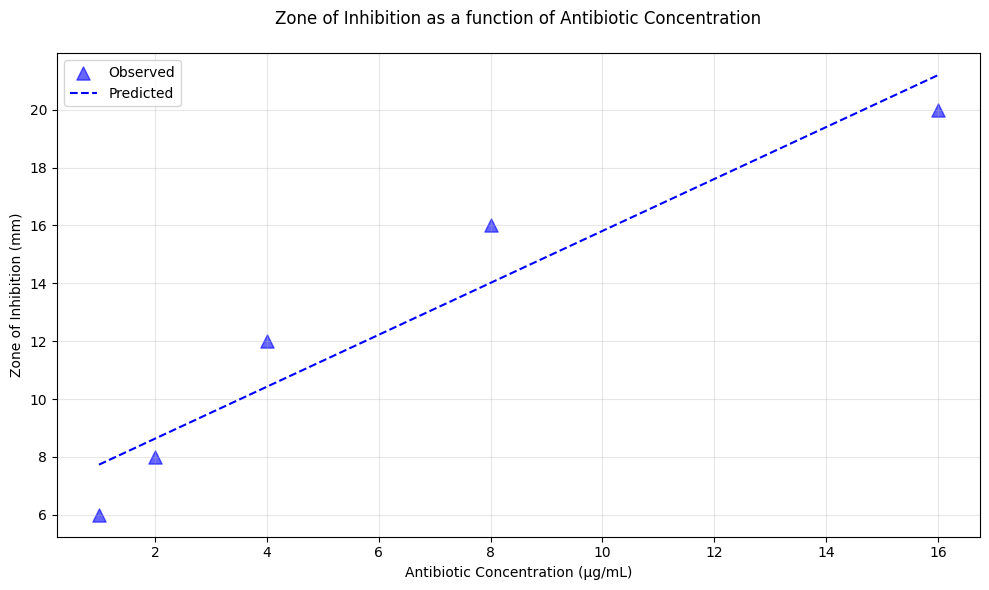

In [85]:
plt.figure(figsize=(10, 6))

plt.scatter(df_small["concentration"], df_small["zone_diameter"], 
label="Observed", color="blue", 
alpha=0.6, marker="^",
s=90)
plt.plot(df_small["concentration"], df_small["predicted"], color="blue", linestyle="--", label=f"Predicted")
plt.xlabel("Antibiotic Concentration (μg/mL)")
plt.ylabel("Zone of Inhibition (mm)")
plt.title("Zone of Inhibition as a function of Antibiotic Concentration\n")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Makes ***predictions*** on new inputs:


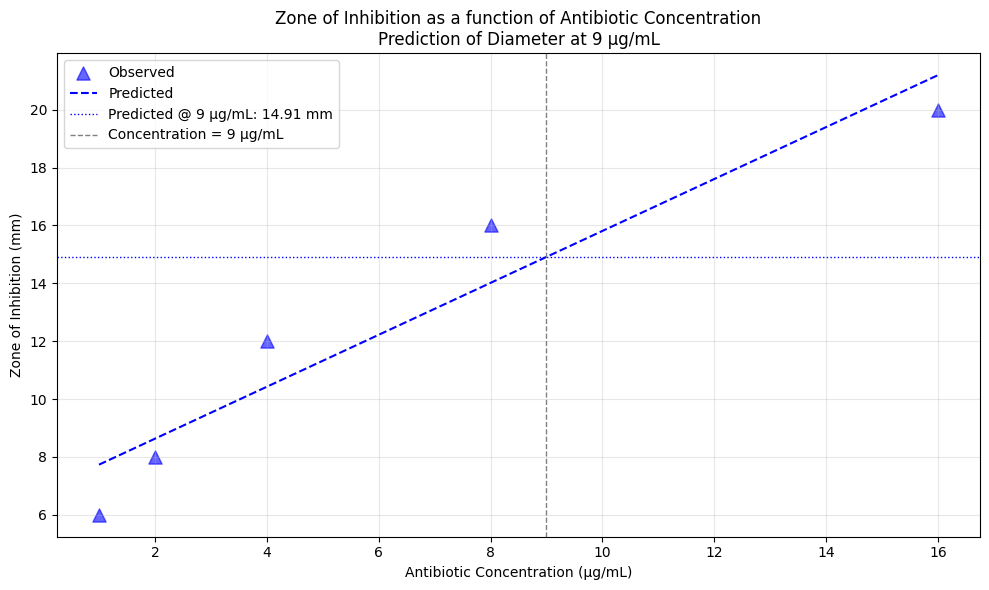

In [107]:
plt.figure(figsize=(10, 6))

plt.scatter(df_small["concentration"], df_small["zone_diameter"], 
label="Observed", color="blue", 
alpha=0.6, marker="^",
s=90)
plt.plot(df_small["concentration"], df_small["predicted"], color="blue", 
linestyle="--", label=f"Predicted")
plt.axhline(pred_small, color="blue", linestyle=":", linewidth=1,
label = f"Predicted @ {target_conc} μg/mL: {pred_small:.2f} mm")
plt.axvline(target_conc, color="grey", linestyle="--", linewidth=1,
label = f"Concentration = {target_conc} μg/mL")
plt.xlabel("Antibiotic Concentration (μg/mL)")
plt.ylabel("Zone of Inhibition (mm)")
plt.title(f"Zone of Inhibition as a function of Antibiotic Concentration\nPrediction of Diameter at {target_conc} μg/mL")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


***Improves*** predictions with ***more*** data:

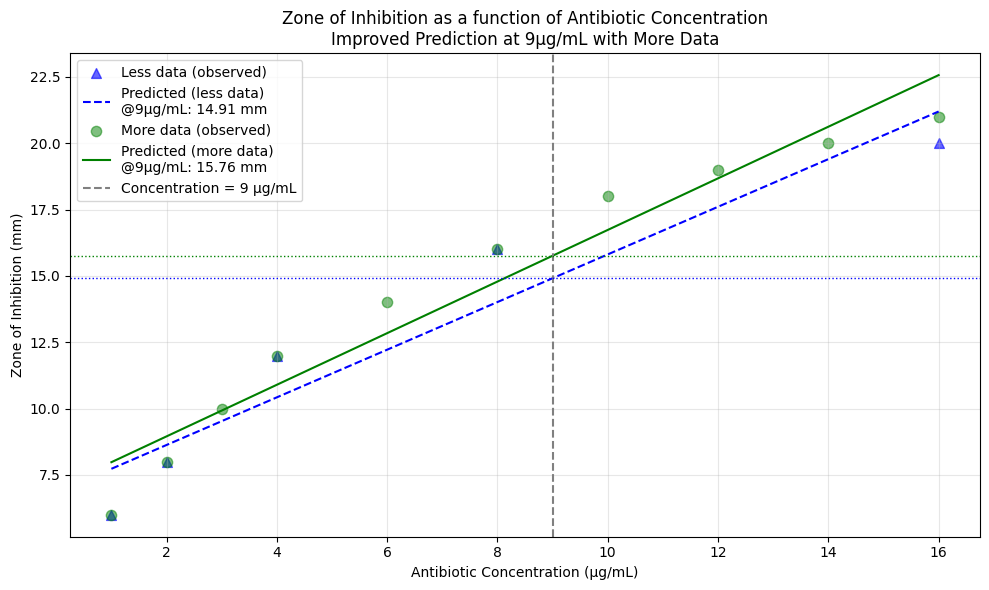

In [108]:
# plot
plt.figure(figsize=(10, 6))

plt.scatter(df_small["concentration"], df_small["zone_diameter"], 
label="Less data (observed)", color="blue", 
alpha=0.6, marker="^", s=50)
plt.plot(df_small["concentration"], df_small["predicted"], color="blue", 
linestyle="--", label=f"Predicted (less data)\n@9μg/mL: {pred_small:.2f} mm")

plt.scatter(df_more["concentration"], df_more["zone_diameter"], 
label="More data (observed)", color="green", 
alpha=0.5, marker="o", s=55)
plt.plot(df_more["concentration"], df_more["predicted"], color="green", 
label=f"Predicted (more data)\n@9μg/mL: {pred_more:.2f} mm")

plt.axvline(target_conc, color="gray", linestyle="--", label=f"Concentration = {target_conc} μg/mL")
plt.axhline(pred_small, color="blue", linestyle=":", linewidth=1)
plt.axhline(pred_more, color="green", linestyle=":", linewidth=1)

plt.xlabel("Antibiotic Concentration (μg/mL)")
plt.ylabel("Zone of Inhibition (mm)")
plt.title("Zone of Inhibition as a function of Antibiotic Concentration\nImproved Prediction at 9μg/mL with More Data")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

With more inputs, the outputs became better. This looks a lot like learning! The types of learning a machine can do so far can be broadly categorized into supervised learning (train on labeled input-output data), unsupervised learning (exploring unlabeled data looking for patterns), and reinforcement learning (algorithm is rewarded when correct). Linear regression is an example of supervised learning because the model was fit on input:output pairs (antibiotic concentration:inhibition zone diameter). Other machine learning algorithms besides linear regression include K-means clustering, Random Forest, and Artificial Neural Networks (ANR). As the name hints towards, ANRs (neural net for short) are ML algorithms that attempt to mimic the human brain with computational layers of "neurons". The simplest type of neural net has one neuron and is called a "perceptron". 

<img src="../../images/12_perceptron.png" width=650>

Neural networks with multiple computational layers of neurons ("hidden layers") are referred to as being *deep*. Deep learning neural nets come in different varieties, like convolutional, generative-adversarial (a method of learning that pits 2 deep neural nets against each other and has one generate realistic fake content and another detect fake content - iron sharpens iron! - eventually the generator fools the discriminator), and our favourite deep learning algorithm, a transformer: ***ChatGPT***! Specifically, ChatGPT is a Large Language Model (LLM) meaning it is trained on *massive* amounts of *text* data to understand and generate language. A transformer looks at all elements in a sequence (a sentence) simultaneously and learns the relative importance of elements (words) to understand your question, then uses that understanding to build its response word-by-word in a *human-like* way. Très IA. 

## GeneGPT

[GeneGPT](https://academic.oup.com/bioinformatics/article/40/2/btae075/7606338) is a specialized large language model (LLM) designed to bridge the gap between natural language understanding and real-time biomedical data access. GeneGPT is fine-tuned to interface with genomics tools and databases like NCBI Entrez and BLAST. It excels at answering complex molecular biology queries by not just relying on pre-trained knowledge, but also by detecting and calling external APIs. For example, if you were to ask "What is the RefSeq ID of the TP53 gene in humans?" GeneGPT would "understand" TP53, Homo sapiens, retrieve RefSeq ID, and determine NCBI Entrez Gene database to be the best source of that information. It will then ***generate commands to retrieve this information*** (see [API calls](https://blog.hubspot.com/website/api-calls)) from NCBI, process the results, and build the response "The RefSeq ID of the human TP53 gene is NM_000546".

While it does not currently have a public web interface like ChatGPT, it introduces the idea of ***domain-specific augmentation*** - LLMs trained on tools and data of a specific field. It is also unqiue in that it "behaves" like a human (reason --> act --> observe --> answer), and by *acting* it uses live biomedical data to produce contemporary responses that, according to the paper, performed better than a number of current LLMs.  



## AlphaFold

One example of a deep neural network that has advanced molecular biology is AlphaFold. [AlphaFold](https://deepmind.google/science/alphafold/) was developed by DeepMind (owned by Google), a British AI research lab co-founded by Nobel laureates Demis Hassabis and John Jumper. AlphaFold1 was released in 2018 and won a protein structure prediction contest, [CASP](https://predictioncenter.org/casp13/index.cgi). By the time AlphaFold2 won CASP again in 2020, it rivaled experimental methods like cryo-EM and X-ray crystallography. The latest edition, AlphaFold3, was released in 2024 and predicts not only the structure of proteins but also how they bind/ interact to molecules like DNA, RNA, ligands, ions, and even chemical reactions. Read more about AlphaFold3 [here](https://blog.google/technology/ai/google-deepmind-isomorphic-alphafold-3-ai-model/#life-molecules).

<img src="../../images/12_protein_prediction_comparison.gif" width= 700>
<div style="font-size: 12px">
"7R6R - DNA binding protein: AlphaFold 3’s prediction for a molecular complex featuring a protein (blue) bound to a double helix of DNA (pink) is a near-perfect match to the true molecular structure discovered through painstaking experiments (gray)."
</div>

<br>
<br>
<img src="../../images/laptop.png" width=70>

Let's [fold](https://alphafoldserver.com/) a protein! 



## BCHM5420 in review

Our goal was to structure the course in a workshop format that guides students from formulating a translational medicine research question through to communication of results while learning best practices for bioinformatic project management and reproducibility. By the end of this course, we hoped that you would be able to:

- Comfortably run a Nextflow pipeline

- Answer an important research question by analyzing and interpreting pipeline results

- Effectively manage a bioinformatics analysis through code repositories using FAIR principles.

### Setting Up your Development Environment


You now know:
- how to set up a development environment from scratch
- how to interact with project management tools (workflow managers, workload managers, package managers, version managers) centrally using an IDE (VS Code) 
- to check extensions marketplace in VS Code to facilitate development
- how the components of your computer interact with CLI
- what an operating system is and different flavours of OS
- the difference between a terminal and shell
- how to update your $PATH variable and check if tools are findable by your OS (`which <tool name>`)
- adding aliases (command shortcuts) to ~/.bashrc file to persist across shells
- how Docker creates a containerized OS with necessary software by sharing (or virtualizing) the linux kernel of your actual OS
- why virtual environments are used
- the difference between a Dockerfile and a Docker image
- where to find Docker images
- how to use Docker interactively or non-interactively
- how to mount volumes (ie. connect a folder on your computer to one inside a container) to access and persist data 
- about apptainer ("Docker for HPCs")
- best practices for naming files (no spaces!!)
- what version control is and a high level overview of how the git system works
- how to use semantic versioning and the importance of consistency with release naming
- how to create a Github account 
- how to set up SSH keys to connect your account to your computer for seamless connection between your local and remote repositories
- the difference between remote and local repositories
- how to create a Github repository
- how to clone a Github repository
- how to create commits and branches on the command line
- how to play the git-game (challenge! go back and see if you can now get to level 10)

### Nextflow

- what workflow management is and why it is important for connecting individual steps of a pipeline
- how workflow management facilitates FAIR principles
- what a domain-specific programming language is
- what Nextflow is and when to use it
- the parts of a Nextflow pipeline: channels, processes, and workflows
- built a process and used it to index a reference file
- how to use docker in Nextflow 
- the layout of a standard Nextflow pipeline
- where to find the parameters and how to adjust them
- how to run individual Nextflow scripts
- how to run Nextflow pipelines from Github
- what parameters are and a few important ones such as `resume`
- what nf-core is and a demo of how to use their community pipelines


### Troubleshooting Nextflow

- how to modify nf-core process labels within the `~/.nextflow/assets` folder to solve `Process requirement exceeds available memory` errors
- how to navigate through the nextflow log files with `nextflow log`
- a breakdown of the log files within the `pipeline_info` folder output by nf-core piplines and the information they hold
- parameters for producing pipeline reports for non nf-core pipelines, (--with-report, --with-timeline, --with-trace, --with-dag)
- about workflow diagrams and environment variables to easily change the version of Nextflow being run (ie. NXV_VER)
- about different error stategies for failing processes (ignore, retry, rety with backoff)
- profiles - sets of parameters can be activated simultaneously during pipeline execution
- how to test a Nextflow pipeline before running on your data
- best approaches to troubleshoot errors
- to remove Nextflow caches with `nextflow clean`

### Data Wrangling and Analysis


- the steps to wrangle data
- retrieved metadata from CLI using NCBI's `EDirect` and a docker container
- the similarities and differences between R and Python
- about object-oriented vs. function-oriented programming languages
- how to run multiple functions through method chaining in Python and pipes in R
- different ways to join dataframes
- ways to handle missing data
- useful packages in R and Python
- to support (or not) your hypothesis with statistical analysis
- what to consider in choosing a statistical test
- what tidy data is
- the three tidy principles to live by: Each variable must have its own column, Each observation must have its own row, Each value must have its own cell.
- the application of these principles to a messy dataset containing antimicrobial resistance genotypes and phenotypes
- pivot functions to transform data (wider vs. longer) in both Python and R
- we covered an example walking through the transformation of the messy dataset in R
- about a few tools for exploratory data analysis (ydata-profiling in Python and DataExplorer in R)



### Documentation and Pair Code Review

- the importance of having an open heart, open source, open mind for bioinformatics code documentation
- what should be included in in well documented code/functions (ex. descriptions of the function, parameter ns return values)
- what should be included in a well documented code repository (ex. a README)
- what should be included in a README (an introduction, workflow diagram, quick start guide, description of parameters, installation instructions and description of outputs)
- how to create a pull request
- how to review a pull request
- tips for documenting your research and analysis with a dry lab notebook 
- posted an issue to a repository (fixme-nf) on GitHub
- how to organize issues with labels
- forked a GitHub reporsitory (fixme-nf)
- made a pull request to a repository (fixme-nf) on GitHub
- how to link issues and pull request with keywords

### Applied Bioinformatics in AMR

- the basics of phenotypic AMR data, the methods used in MTB, and some limitations to consider with this approach
- the basics of genotypic AMR data, the methods used for detecting mutations associated with antimicrobial resistance in MTB
- the advantages and limitations of using genotypic testing for AMR detection
- how to download raw data from the SRA using the SRA explorer
- how to run TBProfiler on the command line to generate AMR genotypic data using the BCCDC-PHL/tbprofiler-nf nextflow pipeline 
- how to run TBProfiler on their webserver with data downloaded from the SRA
- how to navigate TBProfiler output reports
- an walkthrough of the BCCDC-PHL/tbprofiler-nf pipeline
- the basics of reference based assembly, bam files and vcfs
- the TBProfiler resistance database and it's connection to the WHO Catalogue of mutations
- how to compare the phenotypic to genotypic data and classify the results (ie. true negatives, false negatives, true positives and false positives)
- how to measure the performance of TBProfiler compared to the phenotypic data by calculating sensitivity, specificity, PPV, NPV and accuracy
- how to interpret these performance metrics in the context of TB AMR
- the limitations and caveats with this analysis (ie. sample size, multiple resistance mechanisms, mutations with uncertain significance, translating results across populations )


### Microbial Phylodynamics

- what a tree is 
- the different types of trees and their uses
- the anatomy of a tree and terminology
- the meaning of branch lengths in time and divergence phylogenetic trees
- different ways to root (or not) a tree and what each assumes
- what a molecular clock is
- the fundamental steps and tools to conduct a phylogenetic analysis
- phylogenetic inference methods
- what bootstrapping is and when to use it
- introduced to Bayes' Theorem
- how Bayes' Theroem is applied in phylogenetics
- what BEAST is and how to use it
- auxiliary tools required to perform a Bayesian evolutionary analysis
- tried BEAST on a flu sample dataset
- what a phylodynamic analysis looks like applied to a real scenario (flu A(H5N1))
- the different ways to visualize phylogenetic trees


### Advances in Bioinformatics

- what adaptive sampling is
- the basics of RNA structure prediction
- the basics of duplex interaction structure prediction and an example of its application
- a few miscellaneous tips and tricks for finding online tutorials
- a warning to avoid infinite while loops
- what Artificial Intelligence is
- the hallmarks of Machine Learning
- how the terms AI, ML, ANN, deep learning, and LLM relate to each other
- folded a protein with AlphaFold3
- what GeneGPT is 


## What you wanted to know

### How to structure an analysis?

**Answer:** There is no one right way to structure an analysis. This is highly dependent on your input data and resources available to you. There can be an optimal way and there can be the way that works. From this course, you have gained experience working on your research project. You should have ideas about what steps you would do the same way when tacking a new project and what you would do differently. 

You have learned a lot of the time in bioinformatics is spent solving errors and getting workflows set up. 

1. Define your research question explicitly
    - Keep it simple, and break it down into small clear steps 

2. Set aside more time than you think you need for tool configuration 
   - The only thing you know for sure is that you will have some kind of error

3. Plan ahead but be adaptable.
   - You can plan every step of an analysis ahead of time but be prepared to pivot and adapt to different tools depending on what is and isn't working for you.

4. Collaborate with others.
    - Input from your peers and fellow researchers is invaluable. Get multiple perspectives 


### How to read the methods section of a paper?

**Answer:** This can be difficult when writing bioinformatics methods is not particularly standardized. Hopefully from this course you know now what is useful information to include in a methods section (ex. tool verisions, system specifications).

- Breakdown where the tools are stored (hopefully on Github) and their versions.
- Search for additional information in the Github README or in the supplementary material
- Connect with researchers on Slack to clarify information 


When writing your own method sections, include all the information someone would need to reproduce your analysis. Make no assumptions and provide all relevant information. Make your tools open source as much as possible. 


### How to share an analysis reproducibly?

Answer: It is important to consider the software, data inputs, code, and computing platform you used in your analysis in order to share it reproducibly. As discussed there are techniques to manage packages (conda & docker), workflows (Nextflow), and keep track of the versions of your code (git) which can be stored and accessed on public repositories (GitHub). Put yourself in the shoes of someone wanting to run your analysis and think of what you would like to know and always remember: docs or it didn't happen!

## Recap

You should now know a few new hot topics in bioinformatics, be refreshed on everything we covered in this course, and be excited to step into the world of bioinformatics with some good practical knowledge under your belt. We hope you know a bit more about bioinformatics than before and feel more confident tackling those red screens and have some tools in your tool belt to change them to green.


<img src="../../images/12_thats_all.gif" width=800> <br>